# Robotics Module: PID Control Lab

## Introduction to PID Control

**Proportional-Integral-Derivative (PID) controllers** are widely used in industrial control systems for their simplicity and effectiveness. They calculate an "error" value as the difference between a desired setpoint and a measured process variable. The controller attempts to minimize the error by adjusting the process control inputs. 

The PID algorithm involves three separate constant parameters, and accordingly, is sometimes called three-term control:

* **Proportional (P) Term:** This term is proportional to the current error. A larger proportional gain ($K_p$) results in a larger change in the output for a given error. This can lead to a faster response but also increase overshoot and oscillations.
* **Integral (I) Term:** This term is proportional to the integral of the error over time. The integral term eliminates steady-state errors (offset) that can occur with proportional-only control. A larger integral gain ($K_i$) reduces the steady-state error faster but can increase overshoot and lead to oscillations if too large.
* **Derivative (D) Term:** This term is proportional to the rate of change of the error. The derivative term helps to reduce overshoot and settling time by anticipating future errors. A larger derivative gain ($K_d$) can improve stability and reduce overshoot but can make the system more sensitive to noise.

The output of a PID controller is given by:

$$ \text{Output}(t) = K_p \cdot e(t) + K_i \int_{0}^{t} e(\tau) d\tau + K_d \frac{de(t)}{dt} $$

Where:
-   $e(t)$ is the error at time $t$ ($e(t) = \text{Setpoint} - \text{Process Variable}$)
-   $K_p$ is the proportional gain
-   $K_i$ is the integral gain
-   $K_d$ is the derivative gain

## Real Use Case: Robotic Arm Joint Position Control

**Scenario:** Imagine a robotic arm with a single joint that needs to accurately reach and hold a specific angular position. Due to factors like gravity, friction, and motor dynamics, simply applying a fixed voltage to the motor won't guarantee precise positioning. We need a feedback control system to ensure the joint reaches and maintains the desired angle.

**Our Goal:** To use a PID controller to control the angular position of this robotic arm joint. The controller will adjust the motor's input (e.g., voltage or torque) based on the difference between the desired angle (setpoint) and the current measured angle (process variable).

**System Model (Simplified):**
For simulation purposes, we'll model the robotic arm joint as a simple first-order system with some inertia and damping. The input to our system will be the control signal from the PID controller, and the output will be the angular position.

Let's assume the dynamics of the joint can be approximated by:
$$ I \frac{d^2\theta}{dt^2} + B \frac{d\theta}{dt} = \tau_{\text{motor}} $$
Where:
-   $I$ is the moment of inertia of the joint
-   $B$ is the viscous damping coefficient
-   $\theta$ is the angular position
-   $\tau_{\text{motor}}$ is the torque applied by the motor, which is proportional to our PID output.

For simplicity in a discrete-time simulation, we can model the change in position based on the previous position and the applied control signal.

## Simulation Setup

We will use Python to simulate the robotic arm joint and the PID controller.

First, let's import the necessary libraries.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
from IPython.display import clear_output

### PID Controller Class

Let's define a basic PID controller class. This class will handle the calculation of the P, I, and D terms and the overall control output.

In [2]:
class PIDController:
    def __init__(self, Kp, Ki, Kd, dt):
        self.Kp = Kp
        self.Ki = Ki
        self.Kd = Kd
        self.dt = dt  # Time step
        
        self.previous_error = 0
        self.integral = 0
        
    def calculate(self, setpoint, process_variable):
        error = setpoint - process_variable
        
        # Proportional term
        P_term = self.Kp * error
        
        # Integral term
        self.integral += error * self.dt
        I_term = self.Ki * self.integral
        
        # Derivative term
        derivative = (error - self.previous_error) / self.dt
        D_term = self.Kd * derivative
        
        # Update previous error
        self.previous_error = error
        
        return P_term + I_term + D_term

### Robotic Arm Joint Model

This function will simulate the behavior of our robotic arm joint. The input is the control signal from the PID, and it updates the joint's angular position.

In [3]:
def robotic_arm_joint_model(current_angle, control_signal, dt):
    # Simplified model: A higher control signal means faster movement towards that direction
    # Incorporate some damping and inertia-like behavior
    
    # Parameters for the joint model (can be adjusted to change system response)
    inertia_factor = 0.05 # Represents how much the system resists change
    damping_factor = 0.1  # Represents friction/damping
    
    # Calculate acceleration (simplified)
    # The control signal is like a 'force' or 'torque'
    acceleration = (control_signal - damping_factor * current_angle) * inertia_factor
    
    # Update velocity (simplified - just directly affects position change for simplicity)
    # We're directly integrating acceleration into position for this simplified model.
    # In a more complex model, you'd have a separate velocity state.
    
    # The change in angle is proportional to the control signal and inversely proportional to inertia.
    # We'll add some 'momentum' from the previous control signal for a more realistic feel.
    # For simplicity, let's make it a direct change for now, and allow students to think about how to improve it.
    
    # Update the angle based on the control signal
    # Let's say the control signal directly influences the rate of change of angle
    angle_change = control_signal * dt * 0.1 # 0.1 is a sensitivity factor
    new_angle = current_angle + angle_change
    
    # Add some 'noise' to make it more realistic (optional)
    # new_angle += np.random.normal(0, 0.01) 
    
    return new_angle

## Assignment: PID Tuning for Robotic Arm Joint Control

In this assignment, you will tune a PID controller to effectively control the angular position of a simulated robotic arm joint. You will use the **Ziegler-Nichols tuning method (Oscillation Method)** to find initial PID parameters, and then refine them through observation.

### Ziegler-Nichols (Oscillation Method) Review

This method is an experimental tuning method. It involves:

1.  **Setting $K_i = 0$ and $K_d = 0$ (P-only control).**
2.  **Increasing $K_p$ gradually** until the system oscillates with a constant amplitude. This value of $K_p$ is called the **ultimate gain ($K_u$)**.
3.  **Measuring the period of oscillation ($T_u$)** at $K_u$.
4.  **Using the Ziegler-Nichols table** to calculate $K_p, K_i, K_d$ for different controller types.

| Controller Type | $K_p$        | $K_i$             | $K_d$         |
|:----------------|:-------------|:------------------|:--------------|
| P               | $0.5 K_u$    | -                 | -             |
| PI              | $0.45 K_u$   | $1.2 K_p / T_u$   | -             |
| PID             | $0.6 K_u$    | $2 K_p / T_u$     | $K_p T_u / 8$ |

### Step-by-Step Guide:

#### **Step 1: System Initialization and P-only Control**

Initialize the simulation parameters. Set your desired setpoint for the robotic arm joint. Begin by setting $K_i = 0$ and $K_d = 0$ in your `PIDController` instance.

Run the simulation with increasing $K_p$ values to observe the system's behavior.


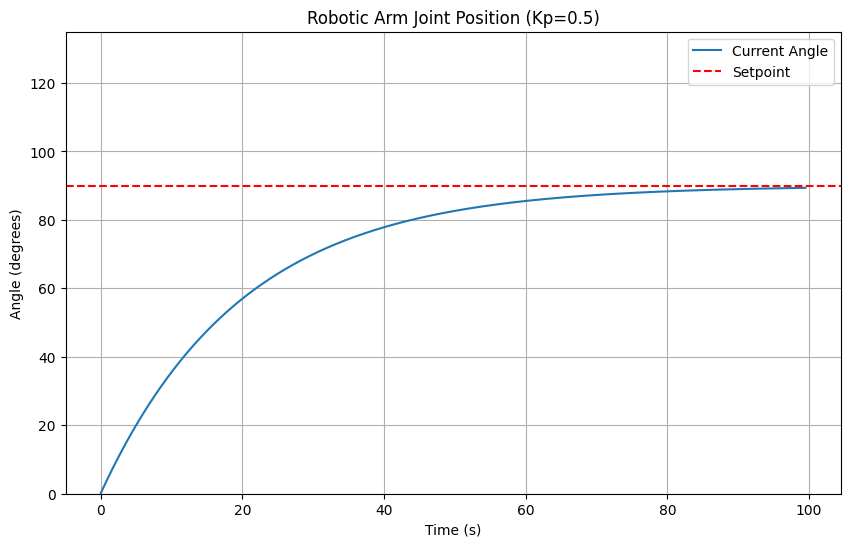

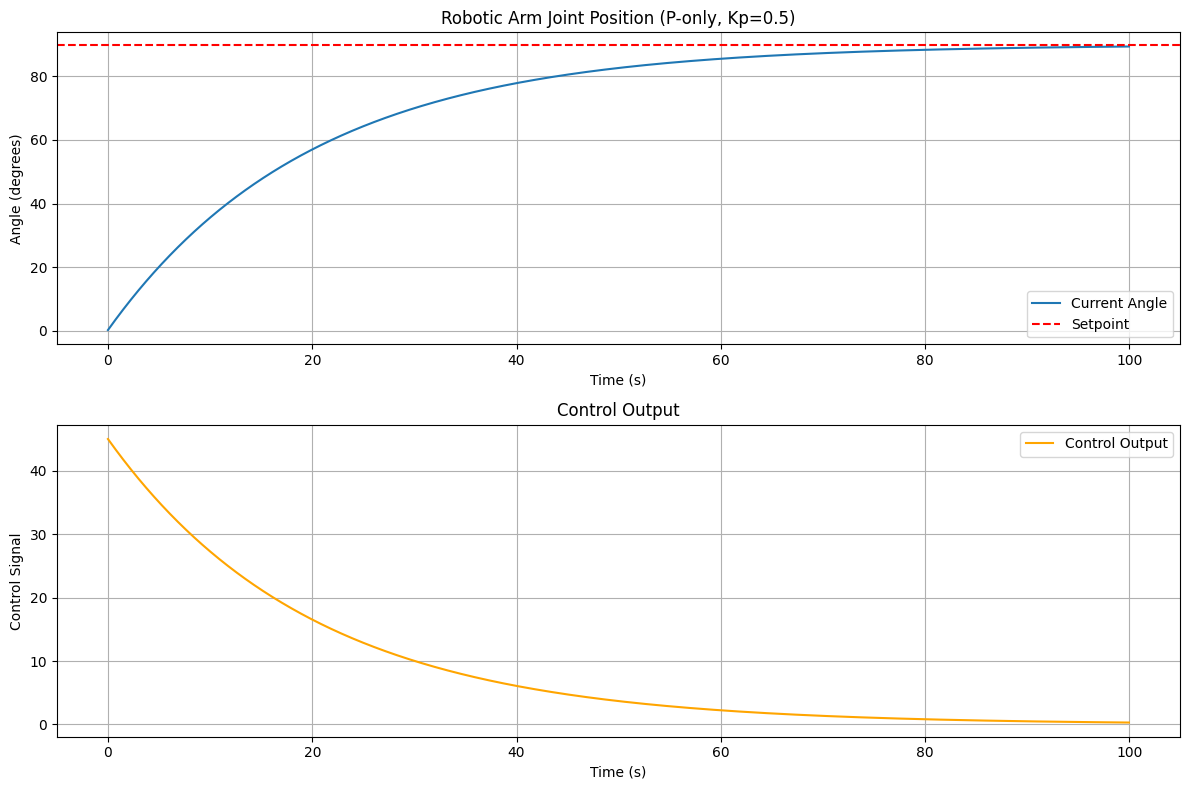

In [4]:
# Simulation Parameters
dt = 0.05  # Time step (seconds)
simulation_time = 100  # Total simulation time (seconds)
num_steps = int(simulation_time / dt)

setpoint_angle = 90  # Desired angle in degrees
initial_angle = 0    # Starting angle

current_angle = initial_angle

angles = []
errors = []
control_outputs = []

# --- P-only control for Ziegler-Nichols --- 
# Start with a small Kp and gradually increase it
Kp_test = 0.5  # <--- **STUDENT: Start with a small Kp and INCREASE this value**
Ki_test = 0
Kd_test = 0

pid_controller = PIDController(Kp_test, Ki_test, Kd_test, dt)

print(f"Running P-only control with Kp = {Kp_test}")

for i in range(num_steps):
    control_signal = pid_controller.calculate(setpoint_angle, current_angle)
    current_angle = robotic_arm_joint_model(current_angle, control_signal, dt)
    
    angles.append(current_angle)
    errors.append(setpoint_angle - current_angle)
    control_outputs.append(control_signal)
    
    # Optional: Introduce a disturbance after some time
    # if i == int(num_steps / 2):
    #    current_angle -= 10 # Suddenly push the arm down by 10 degrees
    
    # Live plotting (can be slow, comment out for faster execution)
    if i % 10 == 0:
        clear_output(wait=True)
        plt.figure(figsize=(10, 6))
        plt.plot(np.arange(len(angles)) * dt, angles, label='Current Angle')
        plt.axhline(y=setpoint_angle, color='r', linestyle='--', label='Setpoint')
        plt.title(f'Robotic Arm Joint Position (Kp={Kp_test})')
        plt.xlabel('Time (s)')
        plt.ylabel('Angle (degrees)')
        plt.grid(True)
        plt.legend()
        plt.ylim(0, setpoint_angle * 1.5) # Adjust y-limit for better visualization
        plt.show()
        time.sleep(0.01)


# Plotting the results for P-only control
plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)
plt.plot(np.arange(num_steps) * dt, angles, label='Current Angle')
plt.axhline(y=setpoint_angle, color='r', linestyle='--', label='Setpoint')
plt.title(f'Robotic Arm Joint Position (P-only, Kp={Kp_test})')
plt.xlabel('Time (s)')
plt.ylabel('Angle (degrees)')
plt.grid(True)
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(np.arange(num_steps) * dt, control_outputs, label='Control Output', color='orange')
plt.title('Control Output')
plt.xlabel('Time (s)')
plt.ylabel('Control Signal')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

#### **Step 2: Determine $K_u$ and $T_u$**

Based on the plots from Step 1, continue adjusting `Kp_test` until you observe sustained oscillations with a constant amplitude. This `Kp_test` value will be your **ultimate gain ($K_u$)**.

Once you find $K_u$, measure the **period of oscillation ($T_u$)**. You can estimate $T_u$ by looking at the time difference between two successive peaks (or troughs) in the oscillation. You can use the `angles` array and the `dt` to calculate this.

**Record your findings here:**
-   $K_u = \text{[Your value]}$
-   $T_u = \text{[Your value]}$

#### **Step 3: Calculate PID Parameters using Ziegler-Nichols Table**

Using your determined $K_u$ and $T_u$, calculate the PID parameters for a PID controller using the Ziegler-Nichols table for the PID control type.

**Calculations:**
-   $K_p = 0.6 \cdot K_u = \text{[Calculated Kp]}$
-   $K_i = 2 \cdot K_p / T_u = \text{[Calculated Ki]}$
-   $K_d = K_p \cdot T_u / 8 = \text{[Calculated Kd]}$

#### **Step 4: Implement and Simulate PID Control**

Now, use the calculated $K_p, K_i, K_d$ values in a new `PIDController` instance and run the simulation. Observe how the system responds.


Running PID control with Kp=1.0, Ki=0.1, Kd=0.05


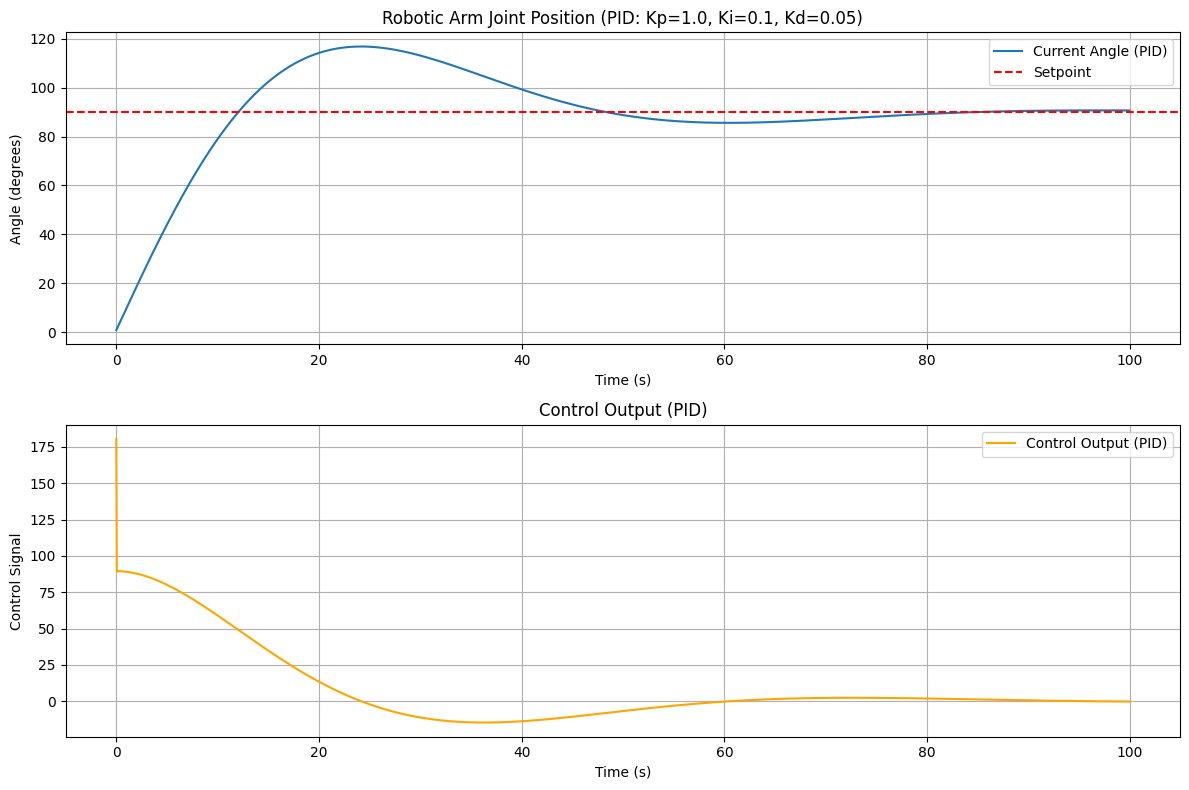

In [5]:
# Simulation Parameters (re-initialize for new run)
current_angle = initial_angle
angles_pid = []
errors_pid = []
control_outputs_pid = []

# --- PID control with Ziegler-Nichols parameters --- 
# **STUDENT: Replace with your calculated Ziegler-Nichols values**
Kp_zn = 1.0 # Example value, replace with your calculated Kp
Ki_zn = 0.1 # Example value, replace with your calculated Ki
Kd_zn = 0.05 # Example value, replace with your calculated Kd

pid_controller_zn = PIDController(Kp_zn, Ki_zn, Kd_zn, dt)

print(f"Running PID control with Kp={Kp_zn}, Ki={Ki_zn}, Kd={Kd_zn}")

for i in range(num_steps):
    control_signal = pid_controller_zn.calculate(setpoint_angle, current_angle)
    current_angle = robotic_arm_joint_model(current_angle, control_signal, dt)
    
    angles_pid.append(current_angle)
    errors_pid.append(setpoint_angle - current_angle)
    control_outputs_pid.append(control_signal)

# Plotting the results for PID control
plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)
plt.plot(np.arange(num_steps) * dt, angles_pid, label='Current Angle (PID)')
plt.axhline(y=setpoint_angle, color='r', linestyle='--', label='Setpoint')
plt.title(f'Robotic Arm Joint Position (PID: Kp={Kp_zn}, Ki={Ki_zn}, Kd={Kd_zn})')
plt.xlabel('Time (s)')
plt.ylabel('Angle (degrees)')
plt.grid(True)
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(np.arange(num_steps) * dt, control_outputs_pid, label='Control Output (PID)', color='orange')
plt.title('Control Output (PID)')
plt.xlabel('Time (s)')
plt.ylabel('Control Signal')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

#### **Step 5: Fine-Tuning**

While Ziegler-Nichols provides a good starting point, it often doesn't yield the optimal performance. Now, you will fine-tune the PID parameters to achieve a desired response (e.g., minimal overshoot, fast settling time, no steady-state error).

**Guidelines for Fine-Tuning:**

* **Start with Proportional ($K_p$):** Increase $K_p$ to reduce the rise time. Too much $K_p$ will cause overshoot and oscillations.
* **Add Derivative ($K_d$):** Increase $K_d$ to reduce overshoot and dampen oscillations. Too much $K_d$ can make the system sensitive to noise and slow down the response.
* **Add Integral ($K_i$):** Increase $K_i$ to eliminate steady-state error. Too much $K_i$ can increase overshoot and cause oscillations.

**Iteratively adjust `Kp_tuned`, `Ki_tuned`, `Kd_tuned` in the code cell below and re-run to observe the effects on the graphs. Aim for a response that reaches the setpoint quickly with minimal overshoot and no steady-state error.**


Running PID control with TUNED Kp=1.2, Ki=0.1, Kd=0.08


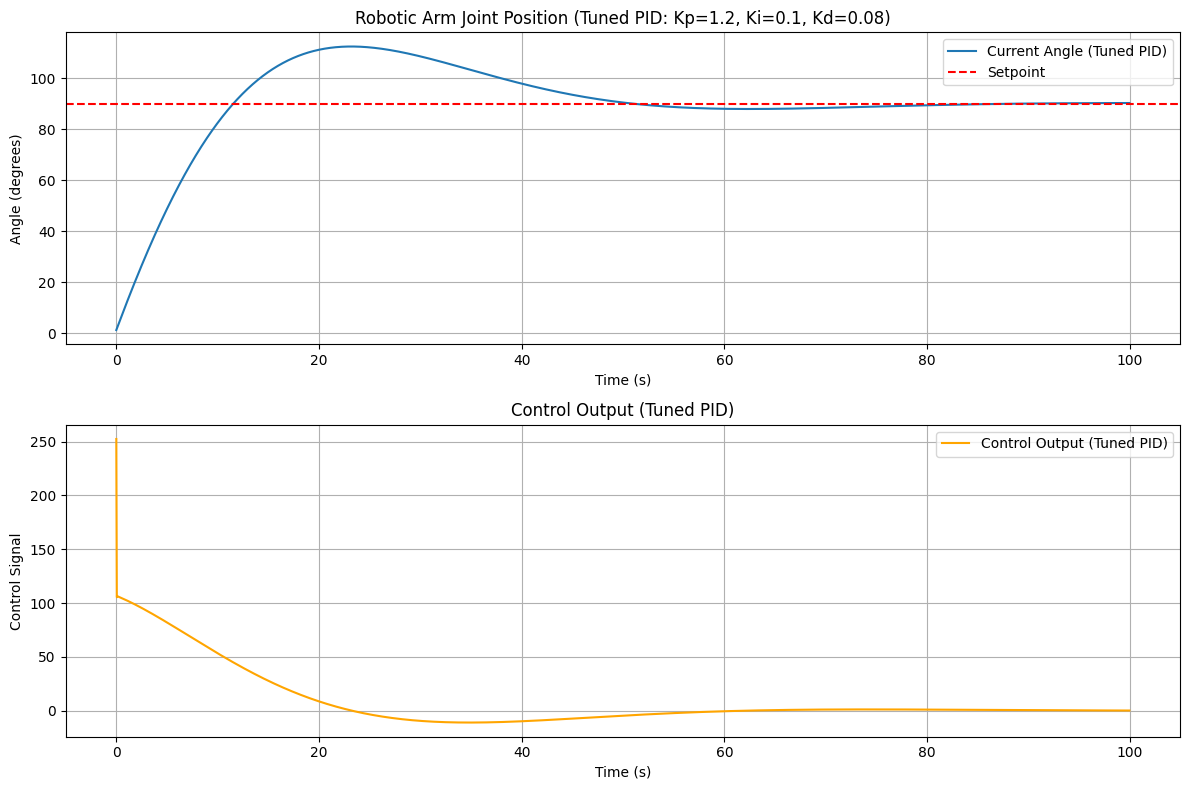

In [6]:
# Simulation Parameters (re-initialize for new run)
current_angle = initial_angle
angles_tuned = []
errors_tuned = []
control_outputs_tuned = []

# --- PID control with Tuned parameters --- 
# **STUDENT: Adjust these values for fine-tuning**
Kp_tuned = 1.2 # <--- Adjust this
Ki_tuned = 0.1 # <--- Adjust this
Kd_tuned = 0.08 # <--- Adjust this

pid_controller_tuned = PIDController(Kp_tuned, Ki_tuned, Kd_tuned, dt)

print(f"Running PID control with TUNED Kp={Kp_tuned}, Ki={Ki_tuned}, Kd={Kd_tuned}")

for i in range(num_steps):
    control_signal = pid_controller_tuned.calculate(setpoint_angle, current_angle)
    current_angle = robotic_arm_joint_model(current_angle, control_signal, dt)
    
    angles_tuned.append(current_angle)
    errors_tuned.append(setpoint_angle - current_angle)
    control_outputs_tuned.append(control_signal)

# Plotting the results for Tuned PID control
plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)
plt.plot(np.arange(num_steps) * dt, angles_tuned, label='Current Angle (Tuned PID)')
plt.axhline(y=setpoint_angle, color='r', linestyle='--', label='Setpoint')
plt.title(f'Robotic Arm Joint Position (Tuned PID: Kp={Kp_tuned}, Ki={Ki_tuned}, Kd={Kd_tuned})')
plt.xlabel('Time (s)')
plt.ylabel('Angle (degrees)')
plt.grid(True)
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(np.arange(num_steps) * dt, control_outputs_tuned, label='Control Output (Tuned PID)', color='orange')
plt.title('Control Output (Tuned PID)')
plt.xlabel('Time (s)')
plt.ylabel('Control Signal')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

## Assessment Questions:

Answer the following questions based on your observations and tuning process:

1.  **Ziegler-Nichols Method:**
    * What were your determined values for $K_u$ and $T_u$?
    * Show your calculations for the initial $K_p, K_i, K_d$ values using the Ziegler-Nichols PID tuning formula.

2.  **Impact of PID Terms:**
    * Describe the effect of increasing $K_p$ (proportional gain) on the system response. How did it affect rise time, overshoot, and steady-state error?
    * Describe the effect of increasing $K_i$ (integral gain) on the system response. How did it affect steady-state error and oscillations?
    * Describe the effect of increasing $K_d$ (derivative gain) on the system response. How did it affect overshoot and settling time?

3.  **Performance Comparison:**
    * Compare the system's performance (in terms of settling time, overshoot, and steady-state error) when using the Ziegler-Nichols initial parameters versus your fine-tuned parameters. Explain the differences you observed.
    * Attach the plots for both the Ziegler-Nichols tuned system and your fine-tuned system.

4.  **Real-World Considerations:**
    * In a real robotic arm, what external factors or disturbances might affect the joint's position, and how would a PID controller help mitigate these? (Think about things not explicitly modeled in our simplified simulation).
    * What are some limitations of the simplified robotic arm joint model used in this simulation, and how might a more realistic model be implemented for control system design?

5.  **Further Improvements:**
    * Suggest one or two ways you could potentially improve the control performance beyond basic PID tuning for this robotic arm joint (e.g., advanced control techniques, modifications to the system).

---